In [ ]:
import os, sys, importlib
import copy
sys.path.append('/content/drive/My Drive/Research/qutip_sim/custom_files')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages/qutip')
from qutip import *

from analysis_tools import *
from sim_functions import *
# from experiment_functions import *

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

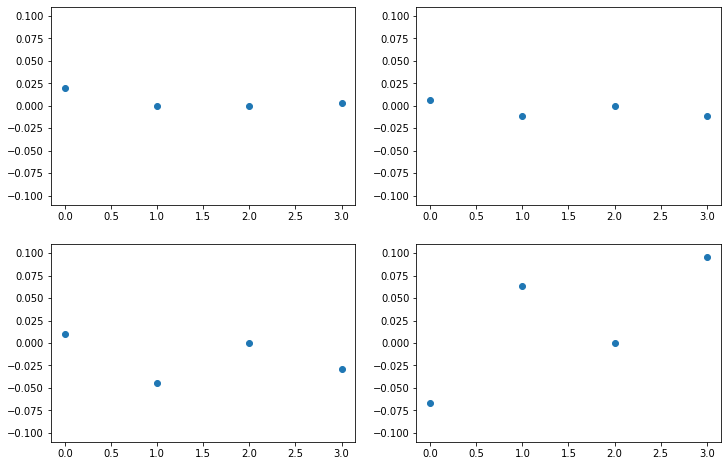

In [ ]:
q1_180 = np.array([0.358, 0.351, 0.351, 0.352]) / 0.351 - 1
q1_90 = np.array([0.170, 0.167, 0.169, 0.167]) / 0.169 - 1
q2_180 = np.array([0.595, 0.563, 0.589, 0.572]) / 0.589 - 1
q2_90 = np.array([0.292, 0.333, 0.313, 0.343]) / 0.313 - 1
print()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axes[0,0].scatter(range(4), q1_180)
axes[0,0].set_ylim(-0.11, 0.11)
axes[0,1].scatter(range(4), q1_90)
axes[0,1].set_ylim(-0.11, 0.11)
axes[1,0].scatter(range(4), q2_180)
axes[1,0].set_ylim(-0.11, 0.11)
axes[1,1].scatter(range(4), q2_90)
axes[1,1].set_ylim(-0.11, 0.11)
plt.plot()

In [ ]:

emp = np.zeros((2,16,1))
reshaped_emp = emp.reshape(16,2,1)
print(np.shape(reshaped_emp))

(16, 2, 1)


In [ ]:
"""
'Hamiltonian_tomography/10_9_long'
'Hamiltonian_tomography/10_8_short'
'Hamiltonian_tomography/10_7'
"""
start = 38
step = 32
N = 12
directory = '/content/drive/My Drive/Research/Data/Experiment/Hamiltonian_tomography/10_19_improved_T2/'
file_name = '-hamiltonian_tomography.run/'
file_list = [start + i * step for i in range(N)]
init_list = ['-i, 1, no echo', '-i, 0, no echo', '-i, -i, no echo', '-i, +i, no echo', '-i, +, no echo', '-i, -, no echo', 
             '-i, 1, echo', '-i, 0, echo', '-i, -i, echo', '-i, +i, echo', '-i, +, echo', '-i, -, echo']


hamiltonian_tomography_exp(directory, file_name, file_list, init_list, include_individual=True)

Output hidden; open in https://colab.research.google.com to view.

## VQE averaged by many points

In [ ]:
"""
'Hamiltonian_tomography/10_9_long'
'Hamiltonian_tomography/10_8_short'
'Hamiltonian_tomography/10_7'
"""
start = 38
step = 32
N = 12
directory = '/content/drive/My Drive/Research/Data/Experiment/Hamiltonian_tomography/10_19_improved_T2/'
file_name = '-hamiltonian_tomography.run/'
file_list = [start + i * step for i in range(N)]
init_list = ['-i, 1, no echo', '-i, 0, no echo', '-i, -i, no echo', '-i, +i, no echo', '-i, +, no echo', '-i, -, no echo', 
             '-i, 1, echo', '-i, 0, echo', '-i, -i, echo', '-i, +i, echo', '-i, +, echo', '-i, -, echo']


hamiltonian_tomography_exp(directory, file_name, file_list, init_list, include_individual=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

for i in range(N):
  blochs = []
  fits = []
  for result in indiv[i], joint[i]:
    den_mat = 0.25 * np.tensordot(pauli(2), result, (0, 0))  
    den_mat_4_4 = bloch_vector(transform_to_4_4(den_mat))
    fit_result = lsq_fit(exp_func, theta[i], den_mat_4_4)

    blochs.append(den_mat_4_4)
    fits.append(fit_result)

  bloch = concatenate_newdim(blochs)
  fit = concatenate_newdim(fits)

  plot_1(theta[i], bloch, fit, y_lim=[0, 1.5], label=['Individual readout', 'Joint readout'])


Initial state: -i, 1


ValueError: ignored

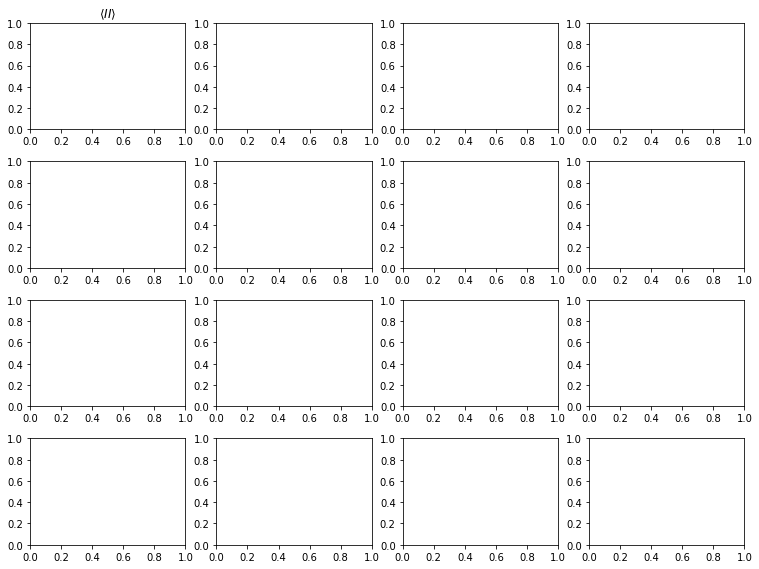

In [ ]:

label = ["II", "IX", "IY", "IZ", "XI", "XX", "XY", "XZ", "YI", "YX", "YY", "YZ", "ZI", "ZX", "ZY", "ZZ"]
init = ['-i, 1', '-i, 0', '-i, -i', '-i, +i', '-i, +', '-i, -',
         '1, -i', '0, -i', '-i, -i', '+i, -i', '+, -i', '-, -i']
        
for i in range(12):
  print('Initial state:', init[i])
  result = concatenate_newdim([indiv[i], joint[i]])
  plot_4_4(theta, result, label)

Initial state: -i, 1


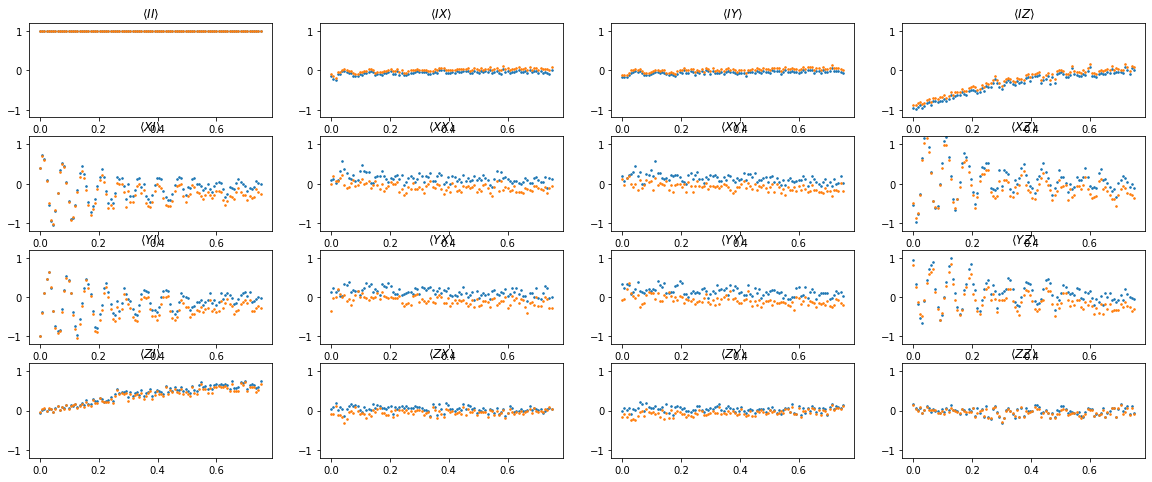

Length of the Bloch vector


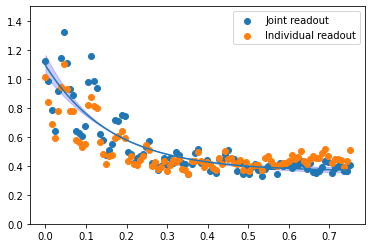

Initial state: -i, 0


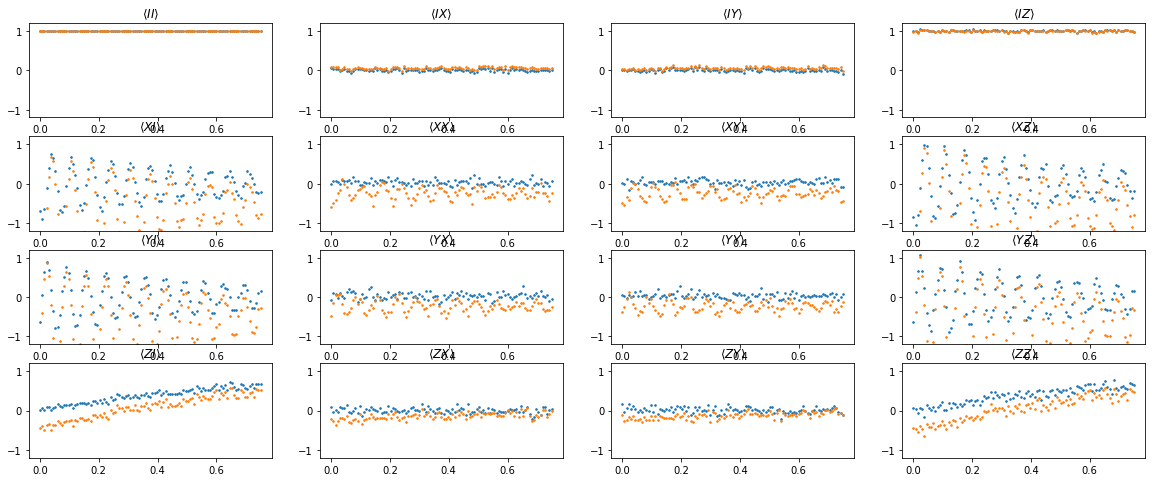

Length of the Bloch vector


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in sqrt


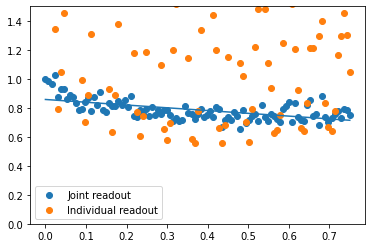

Initial state: -i, -i


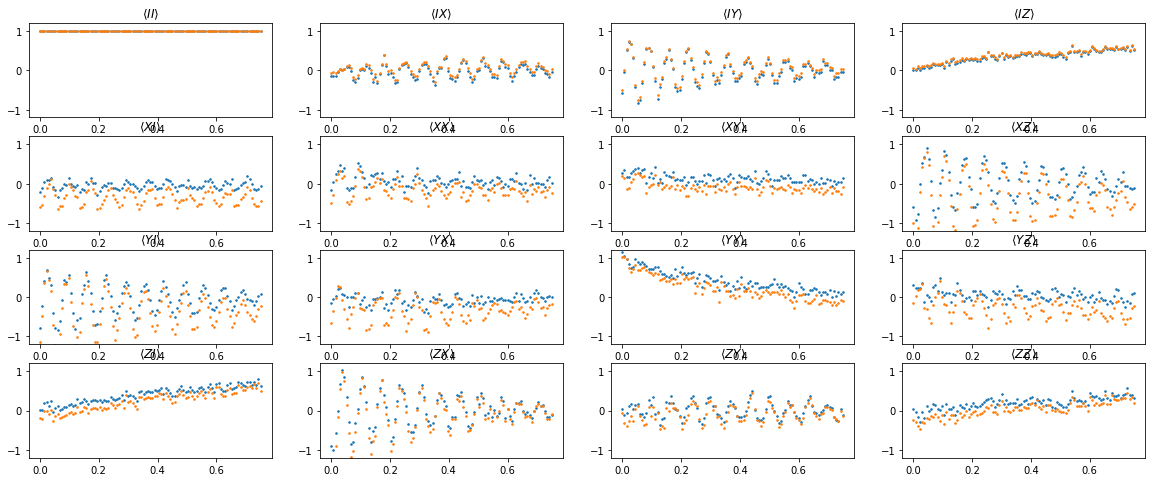

Length of the Bloch vector


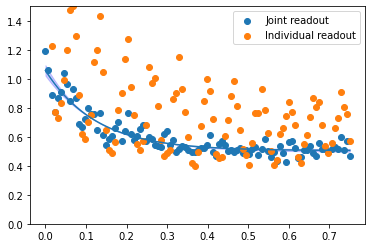

Initial state: -i, +i


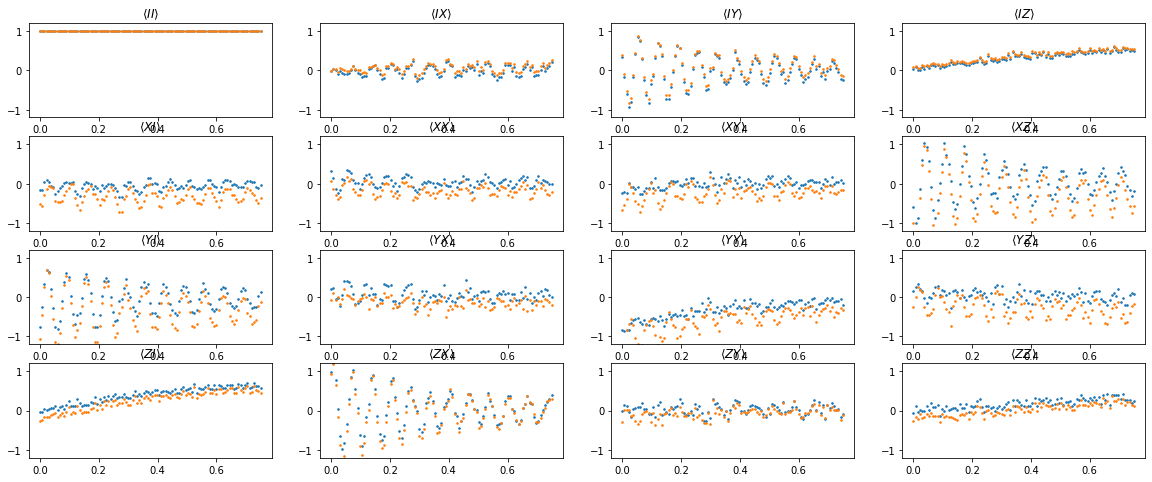

Length of the Bloch vector


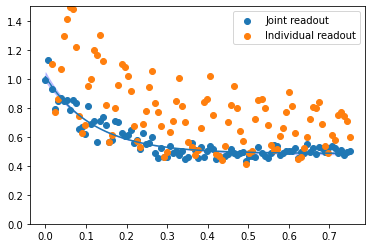

Initial state: -i, +


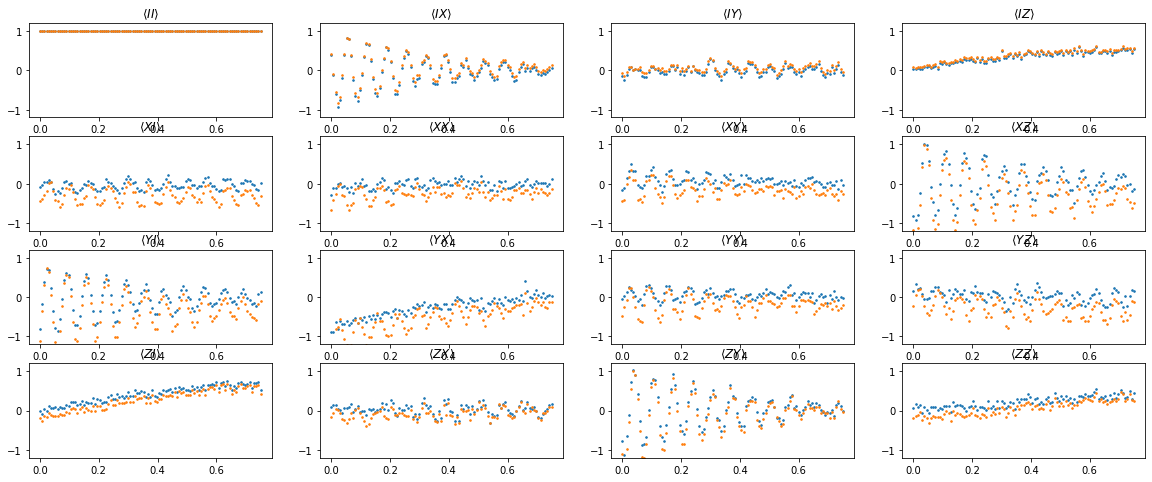

Length of the Bloch vector


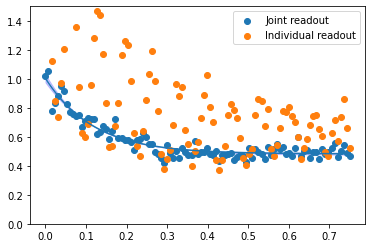

Initial state: -i, -


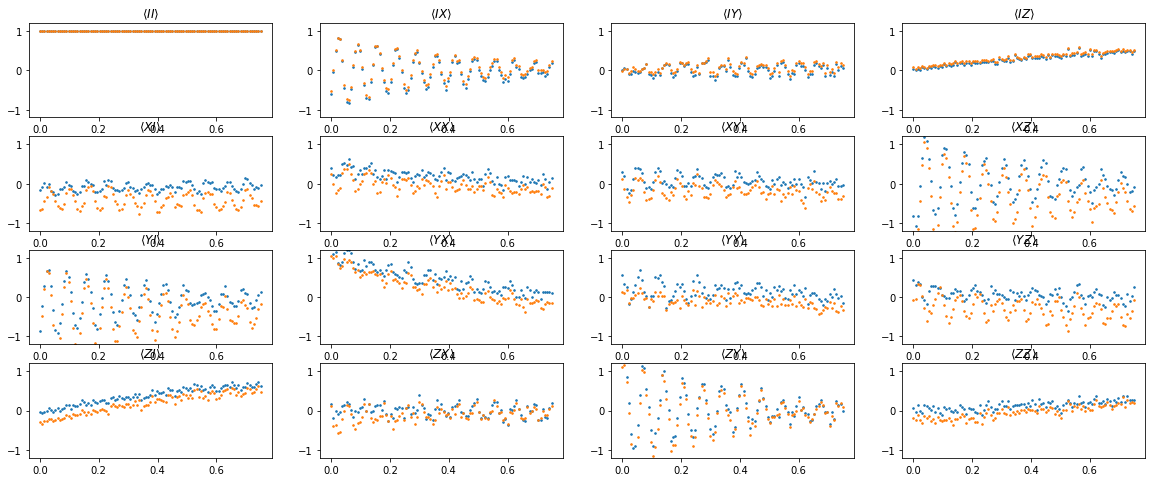

Length of the Bloch vector


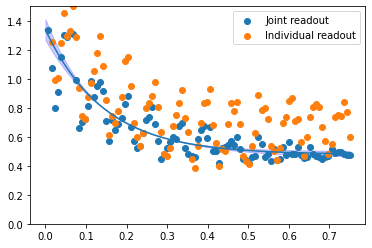

Initial state: 1, -i


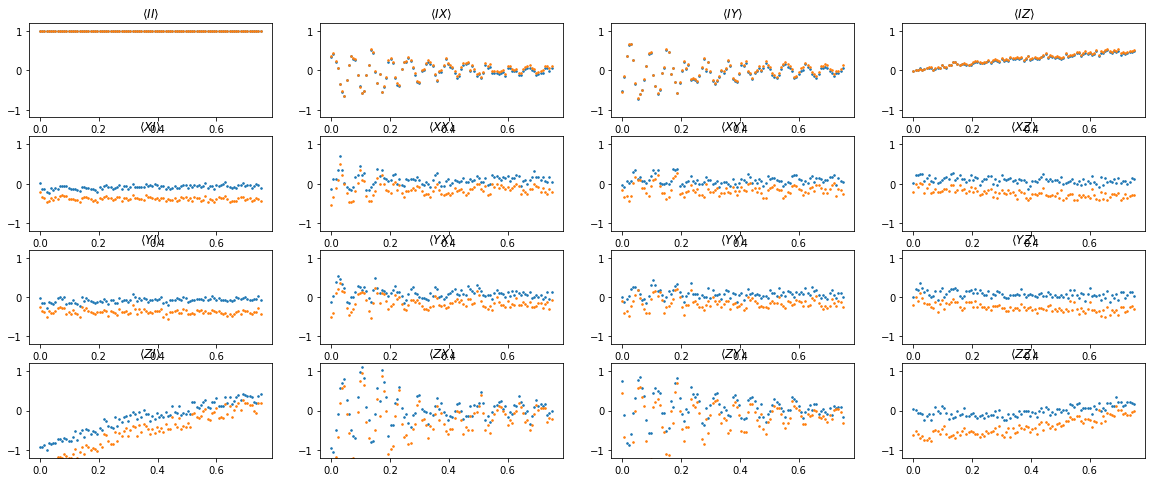

Length of the Bloch vector


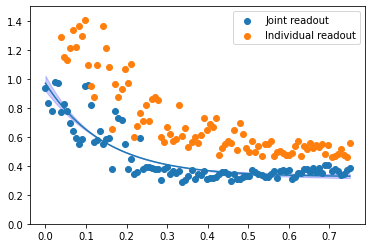

Initial state: 0, -i


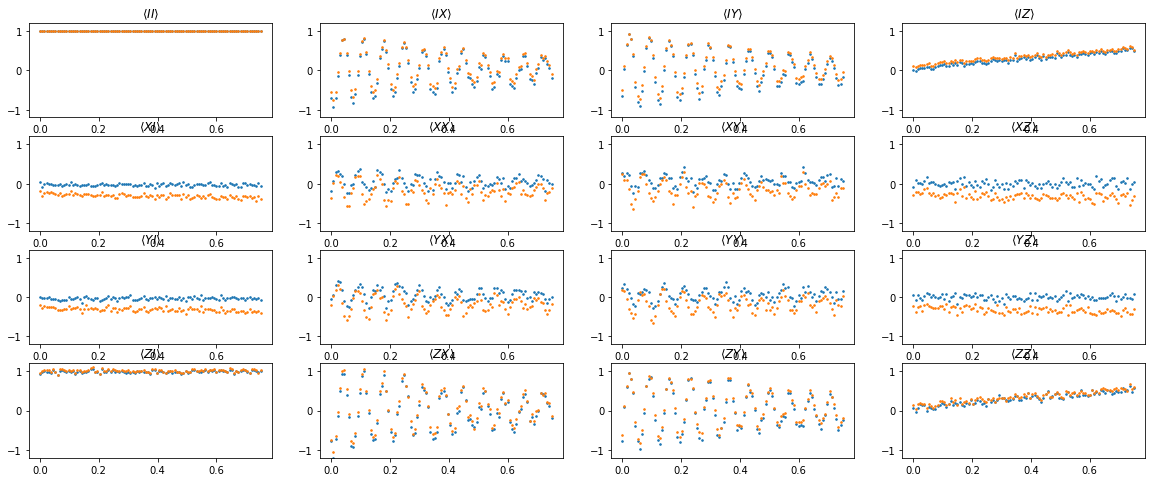

Length of the Bloch vector


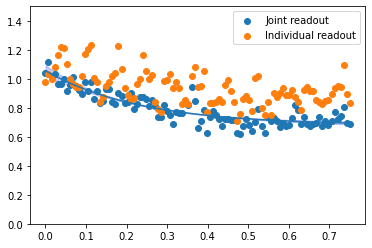

Initial state: -i, -i


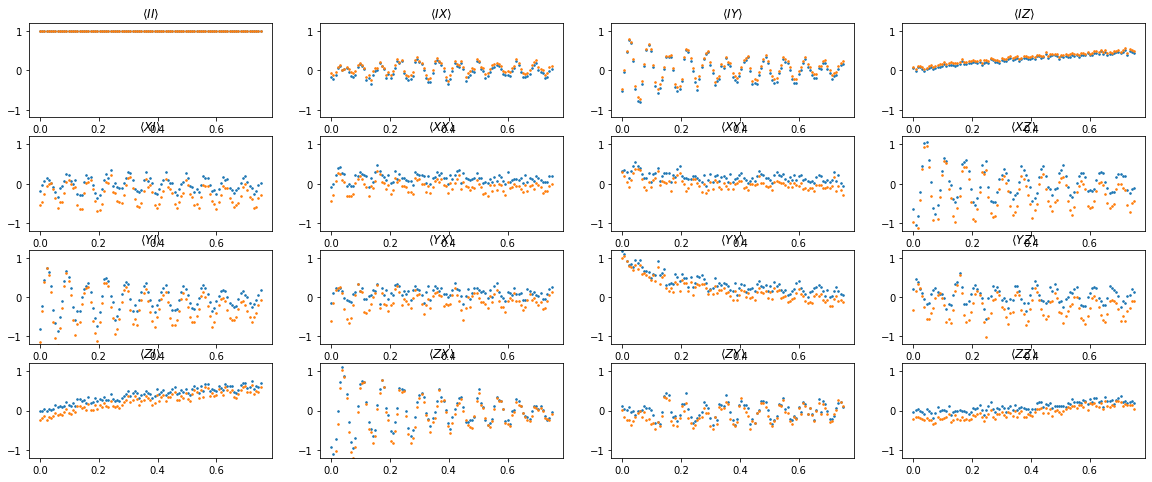

Length of the Bloch vector


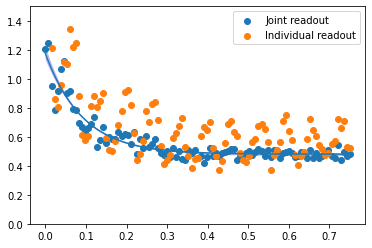

Initial state: +i, -i


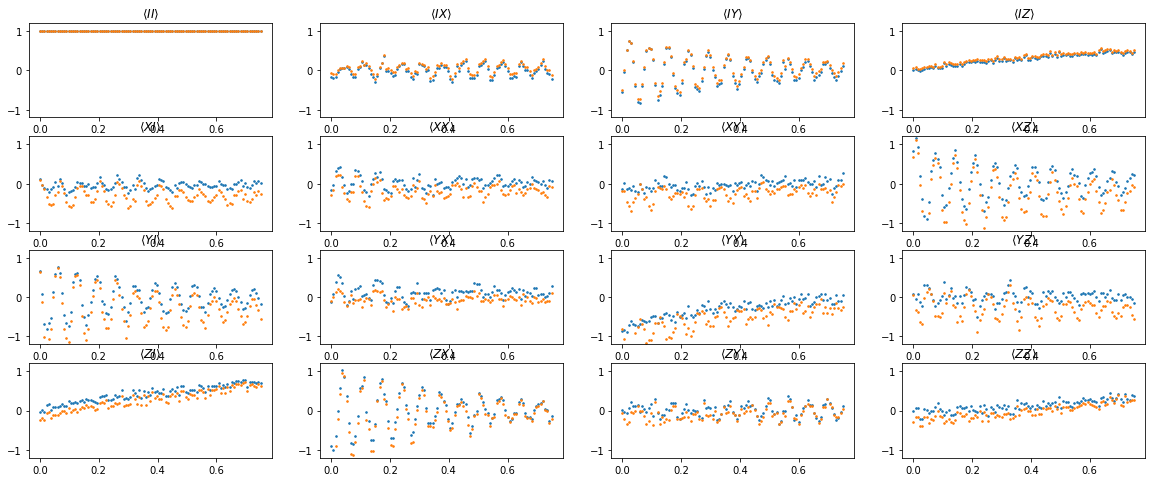

Length of the Bloch vector


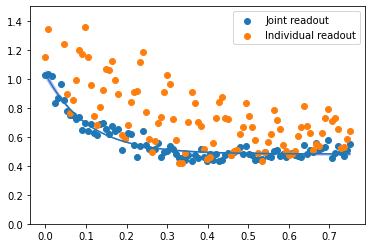

Initial state: +, -i


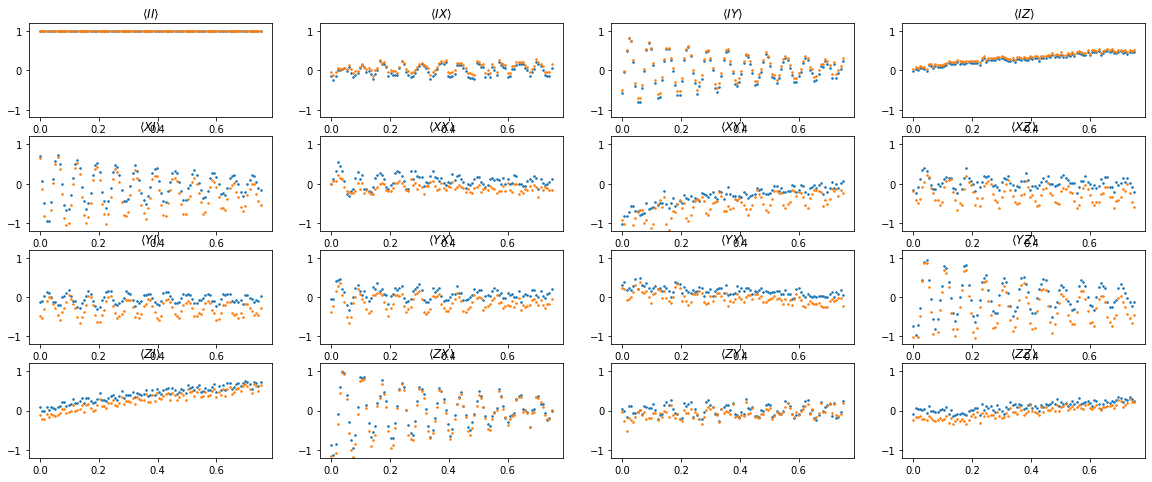

Length of the Bloch vector


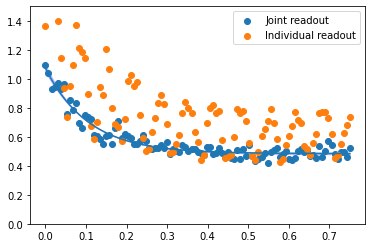

Initial state: -, -i


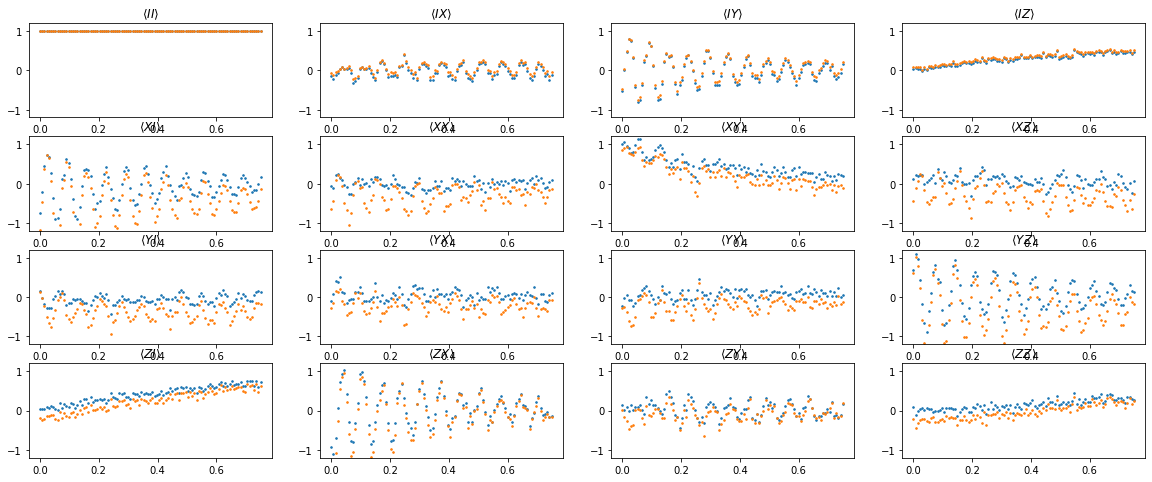

Length of the Bloch vector


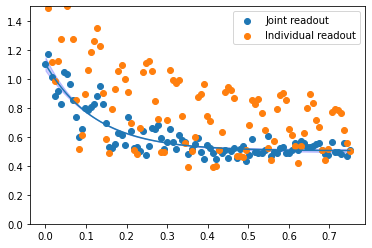

In [ ]:
# result_1echo_joint, result_1echo_indiv, theta_1echo = load_data('Hamiltonian_tomography/10_7', start=116, step=50, num_files=6)
# result_1echo_joint, result_1echo_indiv, theta_1echo = load_data('Hamiltonian_tomography/10_8_short', start=30, step=24, num_files=12)
result_1echo_joint, result_1echo_indiv, theta_1echo = load_data('Hamiltonian_tomography/10_9_long', start=30, step=24, num_files=12)

theta = np.linspace(0, (theta_1echo[-1] - theta_1echo[0])/4, len(theta_1echo))

label = ['-i, 1', '-i, 0', '-i, -i', '-i, +i', '-i, +', '-i, -',
         '1, -i', '0, -i', '-i, -i', '+i, -i', '+, -i', '-, -i']
         
for i in range(12):
  print("Initial state:", label[i])
  full_qst(theta, result_1echo_joint[i], result_1echo_indiv[i])
  #full_qst(theta, result_1echo_indiv[i])

  state_indiv = 0.25 * np.tensordot(paulis, result_1echo_indiv[i], (0, 0))
  state_joint = 0.25 * np.tensordot(paulis, result_1echo_joint[i], (0, 0))
  print("Length of the Bloch vector")
  Bloch_vector_length(state_indiv, state_joint, theta)

In [ ]:
result_1echo_joint, result_1echo_indiv, theta_1echo = load_data('Hamiltonian_tomography/10_5', start=42, step=14, num_files=49)
# result_1echo_joint_2, result_1echo_indiv_2, theta_1echo_2 = load_data('ZZ_time_evolution', start=56, step=35, num_files=3)
theta = np.linspace(0, (theta_1echo[-1] - theta_1echo[0])/4, len(theta_1echo))

label = []
for i in ['1', '1', '-i', '+i', '+', '-', '0']:
  for j in ['1', '1', '-i', '+i', '+', '-', '0']:
    label.append([i,j])

for i in range(49):
  print("Initial state:", label[i])
  full_qst(theta, result_1echo_joint[i], result_1echo_indiv[i])
  #full_qst(theta, result_1echo_indiv[i])

  state_indiv = 0.25 * np.tensordot(paulis, result_1echo_indiv[i], (0, 0))
  state_joint = 0.25 * np.tensordot(paulis, result_1echo_joint[i], (0, 0))
  print("Length of the Bloch vector")
  Bloch_vector_length(state_indiv, state_joint, theta)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


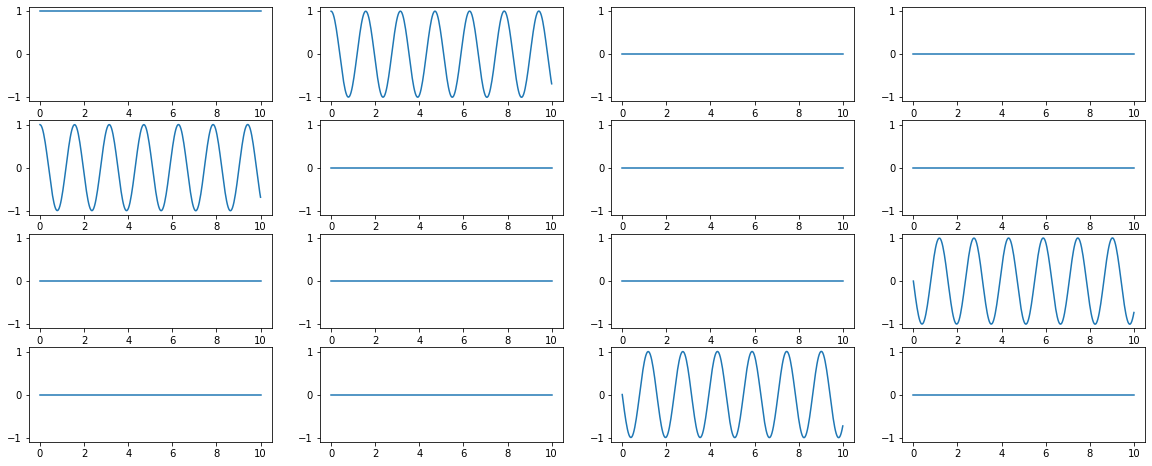

(4, 4, 300)


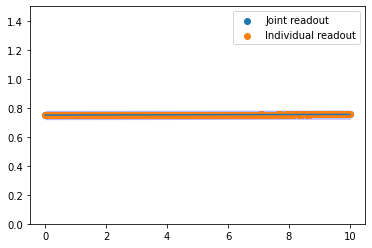

In [ ]:
def commutator(x, y):
  return (np.matmul(x, y) - np.matmul(y, x)) / 2.0j

def hamiltonian(h):
  H = 0
  for i in range(len(h)):
    H += h[i] * paulis[i] / 2
  return H
  
  # 1st order ODE
def Bloch_equation(t, var, *h): 
    
    h = list(h) #, 
    dpdts = []
    for i in range(len(h)):
      dpdt = 0
      for j in range(len(h)):
        hij = np.float(np.trace(np.matmul(hamiltonian(h), commutator(paulis[i], paulis[j]))))
        dpdt += hij * var[j]
      dpdts.append(dpdt)

    return dpdts

# 3d plot
def plot3d(t_list, var_list):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.set_xlabel("$x$")  # x-axis
    ax.set_ylabel("$y$")  # y-axis
    ax.set_zlabel("$z$")  # z-axis
    ax.plot(var_list[0], var_list[1], var_list[2])

    plt.show()

def projection(t_list, var_list):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,8))

    for i in range(int(len(var_list)/4)):
      for j in range(4):
        axes[i,j].plot(t_list, var_list[4*i+j])
        axes[i,j].set_ylim(-1.1, 1.1)

    plt.show()

if (__name__ == '__main__'):
    # 1st order ODE
    t_list = np.linspace(0.0, 10.0, 10000)
    
    hii=0; hix=0.0; hiy=0.0; hiz=0.0; hxi=0.0; hxx=0; hxy=0; hxz=0; hyi=0.0; hyx=0.0; hyy=0; hyz=0.0; hzi=0.0; hzx=0; hzy=0; hzz=2.00
    h = (hii, hix, hiy, hiz, hxi, hxx, hxy, hxz, hyi, hyx, hyy, hyz, hzi, hzx, hzy, hzz)
    var_init = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Initial point
    
    # hx=1; hy=0; hz=0;
    # h = (hx, hy, hz)
    # var_init = [0, 1, 0]  # Initial point

    var_list = integrate.solve_ivp(Bloch_equation, [0,10], var_init, args=h,
                dense_output=True)
    # print(var_list)

    # 3D plot
    #plot3d(t_list, var_list)

    # projection
    t = np.linspace(0, 10, 300)
    e = var_list.sol(t)
    e_
    projection(t, e)
    projection(t, e_corr)
    state = 0.25 * np.tensordot(paulis, e, (0, 0))
    print(np.shape(state))
    Bloch_vector_length(state, state, t)